## EDA on Titatic dataset
Import the required libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

# Upload the csv file to colab


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic.csv to Titanic (2).csv


Load the dataset into pandas dataframe

In [ ]:
titanic_df = pd.read_csv('Titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 # Inspect the dataset

In [ ]:
# Summary stats
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Data types and missing info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data cleaning

In [ ]:
# Drop less useful columns
df = titanic_df.drop(columns=['Ticket', 'Cabin'], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [ ]:
# Check for duplicate entries
df[df.duplicated()].shape

(0, 10)

No duplicate entries

In [ ]:
# Check for missing values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0



*   Age has 177 missing entries
*   Embarked has 2 missing entries



In [ ]:
# Remove rows with missing values
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


# Data analysis and visualization

1.   Survival rate by gender

In [ ]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.752896
male,0.205298


Comments
*   Women have a significantly higher survival rate (0.75) than the men (0.20)



2.   Distribution of age by gender


<Axes: xlabel='Age', ylabel='Count'>

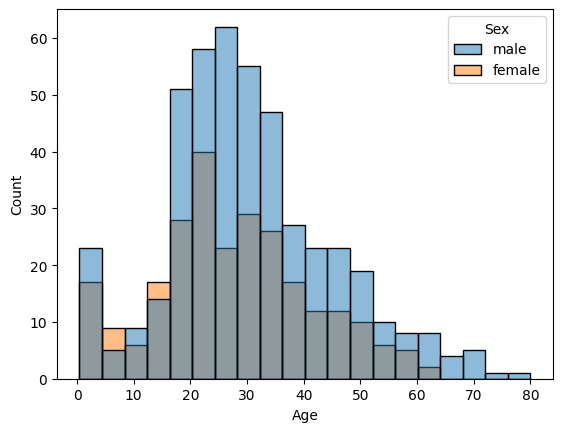

In [ ]:
sns.histplot(df, x='Age', hue='Sex')

Analysis
*   Moles dominate most age groups.However females are relatively more in 4-16 age group.
*   Both genders show a peek around ages 15-35.



3. Age distribution by survival **status**

<Axes: xlabel='Age', ylabel='Count'>

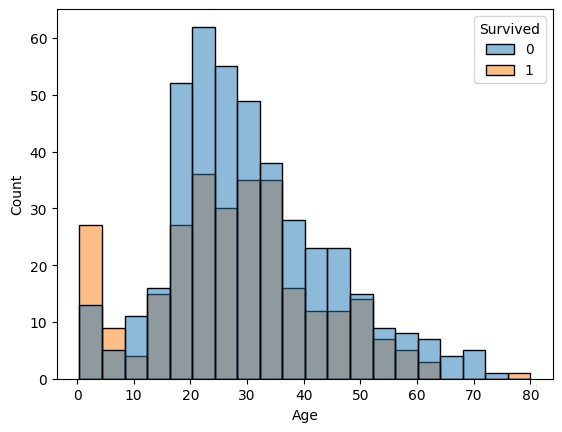

In [ ]:
sns.histplot(df, x='Age', hue='Survived')

Analysis
*   The number of survivors were notably higher for children under 10 and elderly passengers over 75.
*   The highest number of death occurred among passenger aged between 15 and 35 years.


4. Gender vs Survival

<Axes: xlabel='Sex', ylabel='count'>

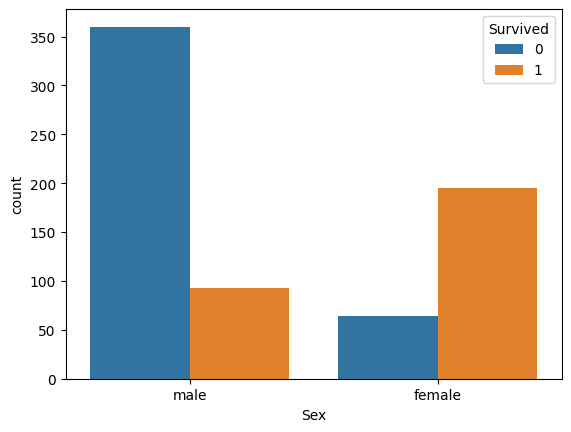

In [32]:
sns.countplot(df, x='Sex', hue='Survived')

Analysis

*  There is a significantly higher number of female survivors compared to male survivors.



5. Pclass vs Survival

<Axes: xlabel='Pclass', ylabel='count'>

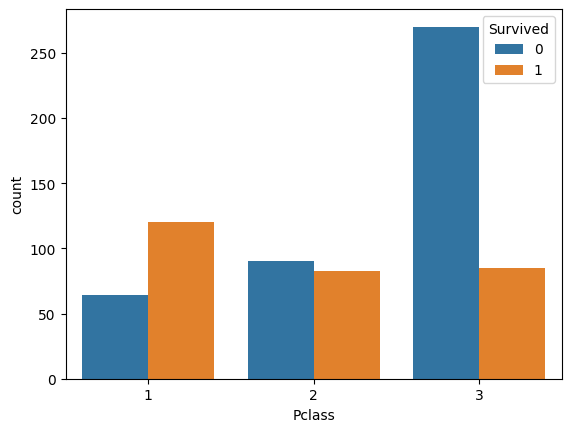

In [34]:
sns.countplot(df, x='Pclass', hue='Survived')

Analysis

*   **3rd class** had a noticeably higher number of death .

6. Fare distribution by gender

<Axes: xlabel='Fare', ylabel='Count'>

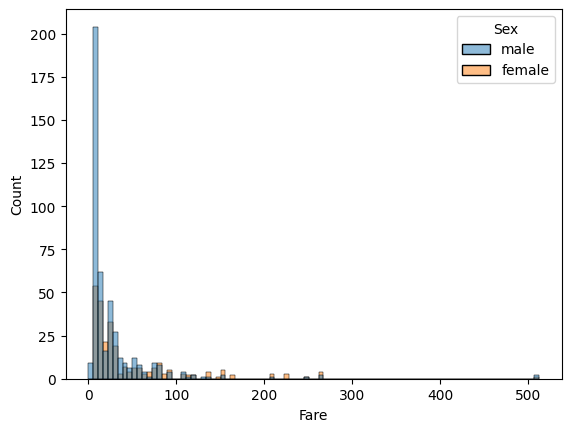

In [35]:
sns.histplot(df, x='Fare', hue='Sex')

Analysis

*   Most passengers (both male and female) paid lower fares (between ).
*   Few females appear in the higher fare ranges



7. Fare distribution by class

<Axes: xlabel='Fare', ylabel='Count'>

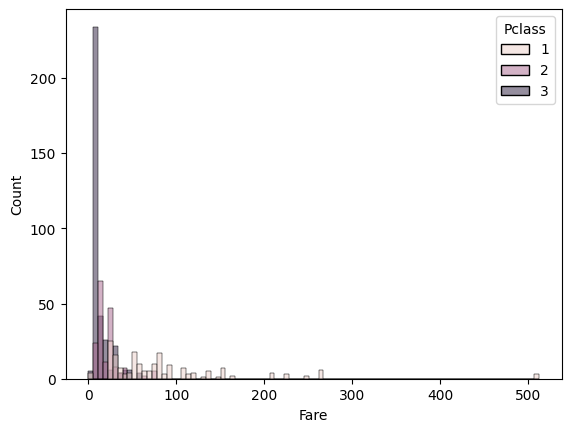

In [36]:
sns.histplot(df, x='Fare', hue='Pclass')

In [39]:
print(df.groupby('Pclass')['Fare'].mean())

Pclass
1    88.048121
2    21.471556
3    13.229435
Name: Fare, dtype: float64


Analysis

*   1st class had higher fares.
*   3rd class had lower fares.
*   Most people traveled in 3rd class.



8. Fare distribution by embarkation port

<Axes: xlabel='Fare', ylabel='Count'>

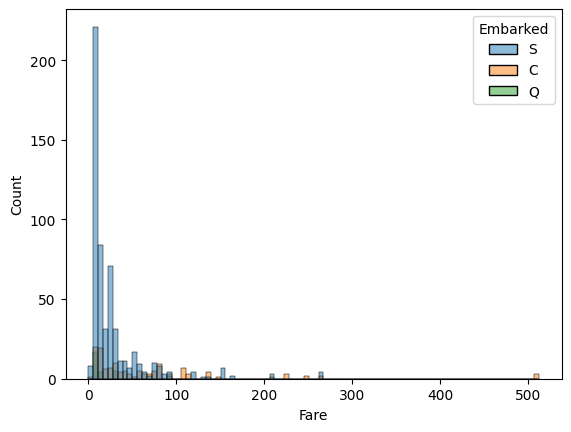

In [37]:
sns.histplot(df, x='Fare', hue='Embarked')

In [38]:
print(df.groupby('Embarked')['Fare'].mean())

Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64


Analysis

*   Passengers embarking at **C (Cherbourg)** paid the highest fares on average
*   Passengers embarking at **Q (Queenstown)** paid the lowest fares on average
*   **(S) Southampton** had the highest number of passengers.



9. Embarktion port vs Survival

<Axes: xlabel='Embarked', ylabel='count'>

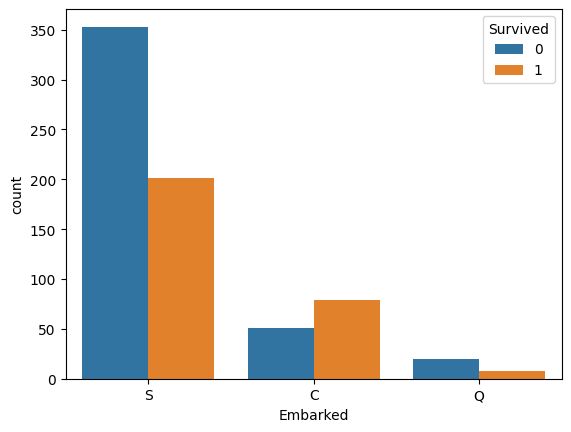

In [46]:
sns.countplot(df, x='Embarked', hue='Survived')

In [45]:
print(df.groupby('Embarked')['Survived'].mean())

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64


10. Embarktion port vs Gender

<Axes: xlabel='Embarked', ylabel='count'>

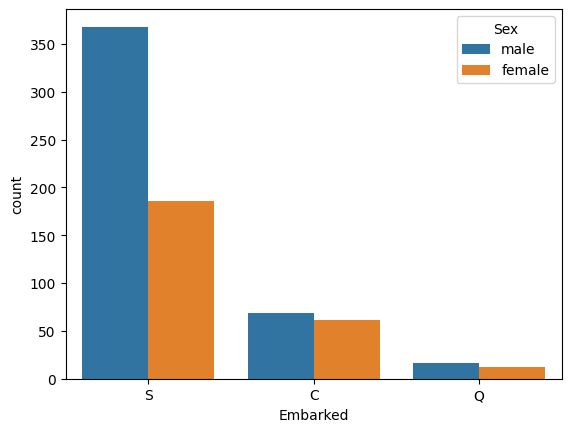

In [49]:
sns.countplot(df, x='Embarked', hue='Sex')

Analysis

*   Southampton had the highest number of male and female passengers



Jointplot

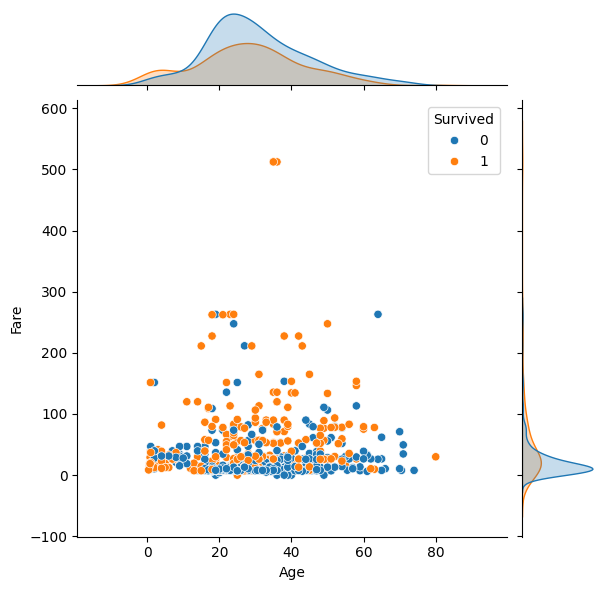

In [50]:
sns.jointplot(data=df, y='Fare', x='Age', hue='Survived')

Scatter plot

<Axes: xlabel='Age', ylabel='Fare'>

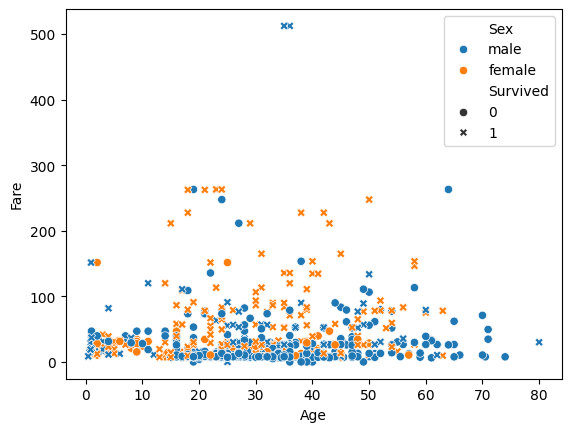

In [51]:
sns.scatterplot(data=df, y='Fare', x='Age', style='Survived', hue='Sex')